# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### 1. Is the distribution of body temperatures normal? 

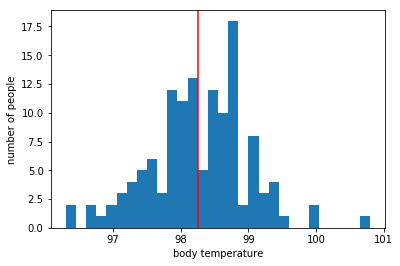

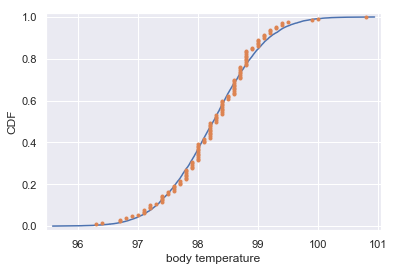

In [3]:
mean=np.mean(df.temperature)
std=np.std(df.temperature)
samples=np.random.normal(mean,std,size=10000)

# Histogram plot
sns.set
_=plt.hist(df.temperature,bins=30)
_=plt.axvline(mean,color='red')
_=plt.xlabel('body temperature')
_=plt.ylabel('number of people')
plt.show()

# Cumulative Distribution Fonction plot
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

x,y=ecdf(df.temperature)
x_theor,y_theor=ecdf(samples)

sns.set()
_=plt.plot(x_theor,y_theor)
_=plt.plot(x,y,marker='.',linestyle='none')
plt.margins(0.02)
_=plt.xlabel('body temperature')
_=plt.ylabel('CDF')
plt.show()

According to the plots, the data seem normaly distributed and may be a representation of the general population. 

### 2. Is the sample size large? Are the observations independent? 

In [4]:
print('sample size =',len(df))

sample size = 130


The sample size is large and it is not specified in the statement if the observations are independent. If the size of the observations is equal or less to 10% than the size of the population, we can treat the observations as independent. And it is not specified either in the statement that it concerns a certain type of population. Thus, this sample represents a very large population and is well below 10% of the size of the population. We can consider the observations as independent. 

### 3. Is the true population mean really 98.6 degrees F? 

Null hypothesis: true population mean=98.6

#### - Bootstrap hypothesis test

In [5]:
# Simulating the situation in which the true mean temperature is 98.6
temperature_shifted=df.temperature-np.mean(df.temperature)+98.6

# Calculating the test statistic
def diff (data):
    return np.mean(data)-98.6
diff_obs=diff(df.temperature) # -0.350769

# bootstrap replicate
def bootstrap_replicate_1d(data,func):
    """Generate bootstrap replicate of 1D data"""
    bs_sample=np.random.choice(data,len(data))
    return func(bs_sample)
def draw_bs_reps(data,func,size):
    """Draw bootstrap replicates"""
    bs_replicates=np.empty(size)
    for i in range (size):
        bs_replicates[i]=bootstrap_replicate_1d(data,func)
    return bs_replicates

# Computing the p_value
bs_replicates=draw_bs_reps(temperature_shifted,diff,10000)
p_value=np.sum(bs_replicates<=diff_obs)/10000
print('p_value =',p_value)

p_value = 0.0


The very low p_value allows us to reject the null hypothesis.This is strong evidence that the true population mean is different than 98.6°.

### - Frequentist statistical testing 

We are going to use a one-sample test because we need to compare one set of data to a single number. 
In this situation, it is appropriate to use the t statistic because we don't know the standard deviation of the general population. Then, we are going to estimate the standard deviation of the sample, approximatively equal to the standard deviation of the population and we need to use a t statistic (to do not underestimate the standard deviation of the population).

In [17]:
# Parameter calculation
population_mean=98.6
sample_mean=np.mean(df.temperature)
sample_std=np.std(df.temperature)
sample_size=len(df)

# T statistic calculation
t=(sample_mean-population_mean)/(sample_std/np.sqrt(sample_size))

print('t* =',t)
print('degree of freedom =',sample_size-1)

t* = -5.475925202078116
degree of freedom = 129


With these values of t and degree of freedom, a t table shows that the p_value is very close to zero. Again, we are going to reject the null hypothesis, the true population mean is different than 98.6°.
Even if we had used a z statistic, with a hight value of z, we couln't be accurate and the p-value will be very close to zero too. It seems that for a high size sample, there is no difference between t and z statitiscs. 

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests. 

In [29]:
# Drawing a small sample of size 10 from the data
new_sample=np.random.choice(df.temperature,size=10)

# Parameter calculation
new_sample_mean=np.mean(new_sample)
new_sample_std=np.std(new_sample)
new_sample_size=len(new_sample)
print('mean of new sample =',new_sample_mean)
print('standard deviation of new sample =',new_sample_std)

# T statistic calculation
new_t=(new_sample_mean-population_mean)/(new_sample_std/np.sqrt(new_sample_size))
print('t* =',new_t)
print('degree of freedom =',new_sample_size-1)

mean of new sample = 98.22999999999999
standard deviation of new sample = 0.6403905058634157
t* = -1.827076953123763
degree of freedom = 9


With a value of t* or z* equal to -1.83, according to a t table, the p_value is equal to 0.05 and according to a z table, the p_value is equal to 0.034. The p_value is higher with a t statistic. The correct one is the t*, because we don't know the standard deviation of the population and we use the standard deviation of the sample as an estimation which underestimate the one of the population. The, for a similar marging of error, we are going to obtain a smaller p_value with a z statistic. For a small size sample, it seems important to use t statistic when we don't know the standard deviation of the population.

### 5. At what temperature should we consider someone's temperature to be "abnormal"? 

#### Bootstrap approach

C:\Users\Diane\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


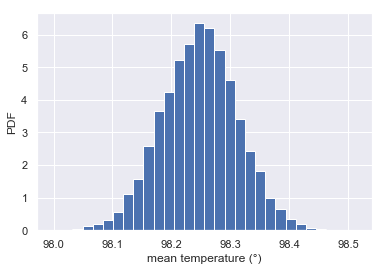

confidence interval = [98.12153846 98.37461538] with a 95% confidence level


In [38]:
# Bootstrap relicate
bs_replicates=draw_bs_reps(df.temperature,np.mean,10000)

# Plotting histogram
sns.set
_=plt.hist(bs_replicates,bins=30,normed=True)
_=plt.xlabel('mean temperature (°)')
_=plt.ylabel('PDF')
plt.show()

# Confidence interval
conf_int=np.percentile(bs_replicates,[2.5,97.5])
print('confidence interval =', conf_int,'with a 95% confidence level')

#### Frequentist approach

In [39]:
sample_mean=np.mean(df.temperature)
sample_std=np.std(df.temperature)
sample_size=len(df)
t=1.660 # According to the t table
margin_of_error=t*sample_std/np.sqrt(sample_size)
print('Confidence interval = [',sample_mean-margin_of_error,sample_mean+margin_of_error,'] with a 95% confidence level')

Confidence interval = [ 98.14289678883675 98.3555647496248 ] with a 95% confidence level


### 6. Is there a significant difference between males and females in normal temperature?

Null hypothesis = the mean of female temperature is equal to the mean of male temperature. --> The mean of the difference between female temperature and male temperature is equal to zero. Alternative hypothesis = The mean of the difference between female temperature and male temperature is different of zero.

In [57]:
# Parameter calulation
temp_f=df.temperature[df['gender']=='F']
temp_m=df.temperature[df['gender']=='M']
mean_f=np.mean(temp_f)
std_f=np.std(temp_f)
mean_m=np.mean(temp_m)
std_m=np.std(temp_m)
size_f=len(temp_f)
size_m=len(temp_m)

# Marging of error calculation
mean_diff=mean_f-mean_m
std_diff=np.sqrt((std_f*std_f/size_f)+(std_m*std_m/size_m))
z=1.65 # With alpha=0.05 significance level, z* = 1.65
critical_value=z*std_diff

print('The mean difference is equal to =',mean_diff)
print('The critical value is equal to =',critical_value)

The mean difference is equal to = 0.289230769230727
The critical value is equal to = 0.20720153060031501


mean_diff > critical_value We are below the 5%. We reject the null hypothesis in favor of the alternative hypothesis.